<a href="https://colab.research.google.com/github/dekennedy/2020/blob/master/Toaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import datetime as dt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Motor_Vehicle_Collisions_-_Crashes.csv to Motor_Vehicle_Collisions_-_Crashes.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Motor_Vehicle_Collisions_-_Crashes.csv']))



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df2020 =  df[df['CRASH DATE'].dt.year ==2020]
# df2020 = df2020.dropna(subset=['LATITUDE'])
# df2020 =  df2020[df2020['BOROUGH'] == 'MANHATTAN']
# df2020 =  df2020[df2020['NUMBER OF PERSONS KILLED'] != 0]


df2020.head()


len(df2020)



93111

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error , median_absolute_error
warnings.filterwarnings("ignore")
%matplotlib inline



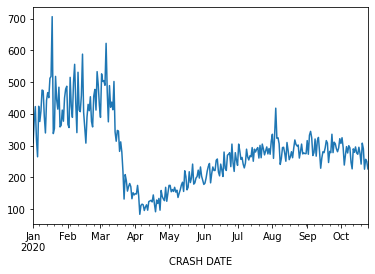

In [ ]:
CrashChart = df2020.groupby(['CRASH DATE']).size()
CrashChart.plot()


In [ ]:
import folium
from folium.plugins import HeatMap



In [ ]:
df_locations = df2020.groupby(['LATITUDE', 'LONGITUDE']).sum().reset_index().sample(200)



df_locations.head()



,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
38133,40.841736,-73.89770,0.0,0.0,0,0,0,0,0,0,4355649
13285,40.672607,-73.88566,0.0,0.0,0,0,0,0,0,0,4352528
23529,40.721638,-74.01192,0.0,0.0,0,0,0,0,0,0,8620716
30559,40.762550,-73.76332,0.0,0.0,0,0,0,0,0,0,4275555
27736,40.747665,-73.94506,1.0,0.0,0,0,0,0,1,0,4296908


In [ ]:
m = folium.Map([df_locations.LATITUDE.mean(), df_locations.LONGITUDE.mean()], zoom_start=11)
for index, row in df_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                                               ).add_to(m)
    
points = df_locations[['LATITUDE', 'LONGITUDE']].to_numpy()
m.add_children(HeatMap(points, radius=15)) # plot heatmap

m